# Sieci neuronowe i Deep Learning
# Temat 5: Moduł torch.nn w bibliotece PyTorch

## Zadanie 5.1

Wykorzystując moduł `torch.nn`, zbudować sieć MLP dla zadania
klasyfikacji odręcznie pisanych cyfr na podstawie zbioru danych MNIST, rozważanego w ramach zajęć nr 3 (patrz notebook do tematu nr 3).

- W pierwszej kolejności odtworzyć sieć implementowaną od podstaw jako przykład w ramach zajęć nr 3 i porównać otrzymane wyniki.

- Następnie rozważyć różne modyfikacje tej sieci z wykorzystaniem możliwości, które daje moduł `torch.nn` (rozważyć inną liczbę i budowę warstw ukrytych, przetestować różne funkcje aktywacji oraz inne algorytmy optymalizacyjne z modułu `torch.optim`). Porównać otrzymane wyniki.

Wszystkie sieci w ramach tego zadania skonstruować na podstawie tych samych danych uczących, walidacyjnych i testowych – utworzonych w analogiczny sposób jak w notebooku z wykładu 3.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils

In [14]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Test the model and visualize some predictions
def test_and_visualize(model, test_loader, classes, dataset = "MNIST" or 'CIFAR'):
    model.eval()  # Set the model to evaluation mode
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Display images
    imshow(torchvision.utils.make_grid(images[:4]))
    print('GroundTruth:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

    # Predict
    if dataset == "MNIST":
        images = images.view(-1, 28 * 28)
    elif dataset == "CIFAR":    
        images = images.view(-1, 32 * 32 * 3)
    else:
        raise ValueError("Unsupported dataset. Use 'MNIST' or 'CIFAR'.")    
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))

Epoch 1/5, Loss: 1.047499110767328
Epoch 2/5, Loss: 0.3835636081773716
Epoch 3/5, Loss: 0.32635355783678066
Epoch 4/5, Loss: 0.2949536548478644
Epoch 5/5, Loss: 0.27183345782318347


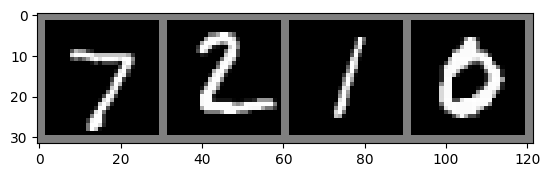

GroundTruth: 7 2 1 0
Predicted: 7 2 1 0


In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

# Test and visualize
classes = tuple(str(i) for i in range(10))  # MNIST class labels (digits 0-9)
test_and_visualize(model, test_loader, classes, 'MNIST')

## Zadanie 5.2*

Wykorzystując moduł `torch.nn`, zbudować od podstaw prostą sieć MLP dla dowolnie wybranego zadania klasyfikacji (np. na podstawie danych z biblioteki `torchvision.datasets`).

Epoch 1/5, Loss: 2.041258598227635
Epoch 2/5, Loss: 1.7679563635755378
Epoch 3/5, Loss: 1.6475494430802973
Epoch 4/5, Loss: 1.5734195367759451
Epoch 5/5, Loss: 1.5154019112477217


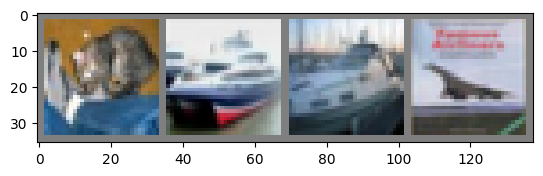

GroundTruth: cat ship ship plane
Predicted: cat ship ship plane


In [16]:
# Load CIFAR-10 dataset
cifar_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)
cifar_test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)

cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=64, shuffle=True)
cifar_test_loader = DataLoader(cifar_test_dataset, batch_size=64, shuffle=False)

# Define a simple MLP model for CIFAR-10
class CIFAR_MLP(nn.Module):
    def __init__(self):
        super(CIFAR_MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer for CIFAR-10
cifar_model = CIFAR_MLP()
cifar_criterion = nn.CrossEntropyLoss()
cifar_optimizer = optim.SGD(cifar_model.parameters(), lr=0.01)

num_epochs = 5
for epoch in range(num_epochs):
    cifar_model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in cifar_train_loader:
        # Zero the parameter gradients
        cifar_optimizer.zero_grad()

        # Forward pass
        outputs = cifar_model(inputs)
        loss = cifar_criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        cifar_optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(cifar_train_loader)}")

# Function to unnormalize and display an image


# CIFAR-10 class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Test and visualize
test_and_visualize(cifar_model, cifar_test_loader, classes, 'CIFAR')